In [2]:
NAME = "" # put your full name here
COLLABORATORS = [] # list names of anyone you worked with on this homework.

# [ER 131] Homework 6: Gradient Descent

This homework focuses on gradient descent. By the end of this homework, we want you to be able to:
* build a simple linear model to predict data
* write functions in Python to prevent unecessarily replicating code
* explain why a model is insufficient in predicting values



### Table of Contents
* [Project](#project)<br>
1. [A Simple Model](#model)<br>
1. [Fitting the Model](#fitting)<br>
1. [Increasing Model Complexity](#complexity)<br>
1. [Gradient Descent](#gd)<br>

---

## Section A: Project (5 pts)<a id='project'></a>

**Question A.1** Who will you be working with on the project? Enter first + last names of all your group members below.

*YOUR ANSWER HERE*

**Question A.2** What prediction questions will your group be exploring? As in HW 4, your answer can be preliminary - it's ok (and expected) if it changes and becomes more refined throughout the next few weeks. Write down at least two.  Make it clear that you're posing prediction problems, not inference problems. 

*YOUR ANSWER HERE*

**Question A.3** In a few sentences, explain the *motivation* behind your prediction problems. Who would be interested in seeing the results your prediction model? Why is it important to answer these questions?

*YOUR ANSWER HERE*

## Introduction to Gradient Descent

Before we dive into the data and the homework, let's set up our motivation for exploring gradient descent. So far, we've been finding model parameters for linear regression by defining a loss function: a function that we want to minimize. Specifically, this loss function has been the mean squared error (MSE) - the linear regression fitting that we did in homework 5 and lab 5 worked by solving for the parameter values that minimize the mean squared error on the training data. To minimize the MSE, we have to take its derivative, set it to zero, and solve for the parameters.<br>

This process isn't always feasible. One reason for this is that when you have a problem with a lot of response variables (features), setting the MSE derivative to equal zero becomes computationally intensive and involves inverting a very large matrix; when you have a model with a more complex form than linear regression, finding a derivative of the loss function and setting it to zero can be difficult.  A second reason is that some of the loss functions you might encounter can't be massaged into a form that allows you to find the parameters algebraically.  <br>

This is where gradient descent comes in. For complex models, or models with many features, it's a more efficient way to find the minimum of the loss function. 


**Dependencies:**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight') 

# Set some parameters
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 14
np.set_printoptions(4)

In [4]:
# We will use plot_3d helper function to help us visualize gradient
from hw06_utils import plot_3d

Plotly Package not found. Please run: pip install plotly


----

## Load Data
For this homework, we'll be working with theoretical data.
Load the data.csv file into a pandas dataframe.  

In [5]:
# Run this cell to load our sample data
data = pd.read_csv('data_hw06_2023.csv')
data.head()

,x,y
0,-10.000000,-32.839746
1,-9.797980,-32.293539
2,-9.595960,-31.545320
3,-9.393939,-30.615893
4,-9.191919,-29.562673


In [6]:
data.shape

(100, 2)

---

## Section 1. A Simple Model<a id='model'></a>
Let's start by examining our data and creating a simple model that can represent this data.<br>

**Question 1.1 (2pts)** Define a function `scatter()` that produces a scatter plot. It should take as input the x and y values, and produce a scatter plot with generic "x" and "y" axis labels. Then, plot the $x$ and $y$ data from the `data` df you loaded above.<br><br>

In [7]:
def scatter(x_var, y_var):
    """
    Objective: Generate a scatter plot using x_var (the independent variable) and y_var (the dependent variable)
    Inputs: 
        - x_var: the vector of values x
        - y_var: the vector of values y
    Output: A scatter plot
    """
    ... # create a scatter plot with x_var on the x-axis and y_var on the y-axis
    plt.xlabel('x')
    plt.ylabel('y')
    return # You don't need to specify anything here; an "empty" return statement on a plot will allow us to add other features later.

In [8]:
# SOLUTION
def scatter(x_var, y_var):
    """
    Objective: Generate a scatter plot using x_var (the independent variable) and y_var (the dependent variable)
    Inputs: 
        - x_var: the vector of values x
        - y_var: the vector of values y
    Output: A scatter plot
    """
    plt.scatter(x_var, y_var)
    plt.xlabel('x')
    plt.ylabel('y')
    return 

In [9]:
# # Replace ellipses with your code
# x = ...
# y = ...
# scatter(x,y)

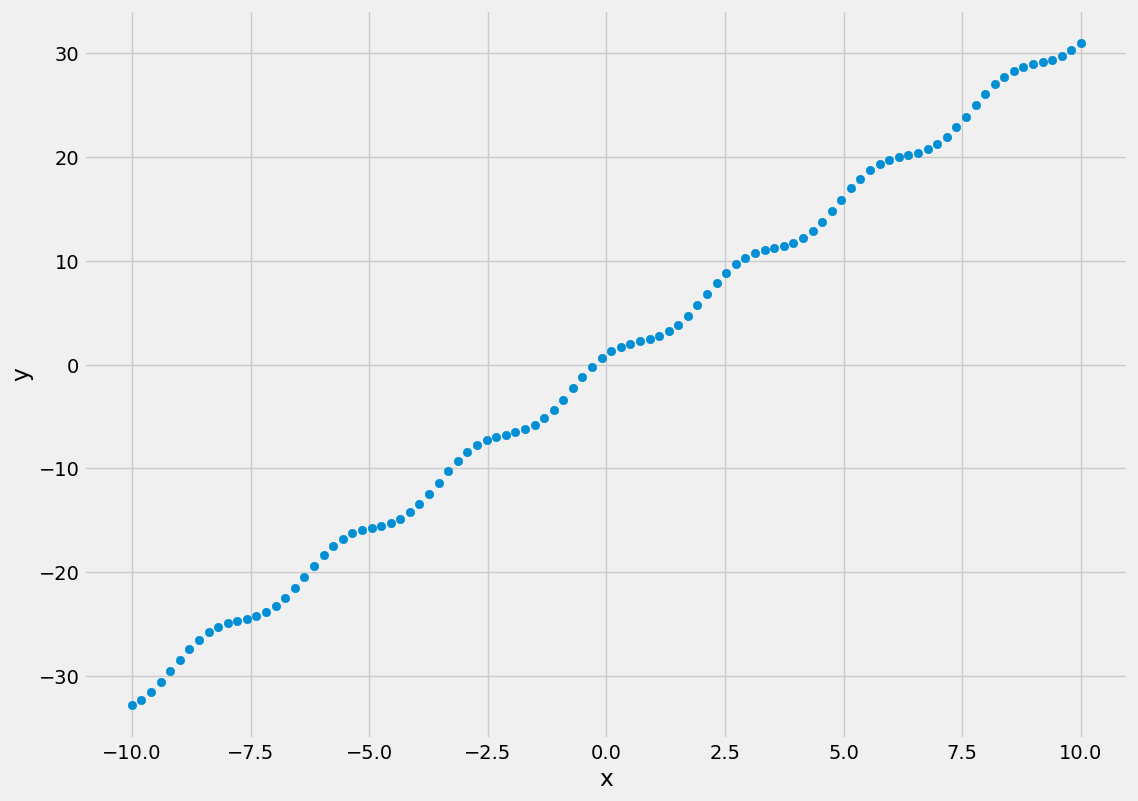

In [10]:
# SOLUTION
x = data['x']
y = data['y']
scatter(x,y)

**Question 1.2 (1pt):** Take a look at the distribution of the data. How can you describe the relationship between $x$ and $y$?

*Your answer here*

*SOLUTION*
Anything that describes the relationship as a positive relationship with an oscillation is fine. 


**Question 1.3 (1pt):** For now, let's assume that the data follows a simple linear model, parametrized by $\theta$:

$\Large
\hat{y} = \theta \cdot x
$

Define a linear model function `linear_model()` that produces predicted $\hat{y}$ values (a vector) given $x$ (a vector) and $\theta$ (a scalar).

In [11]:
def linear_model(x, theta):
    """
    Objective: predict y_hat values given x and theta
    Inputs:
        - x: the vector of values x
        - theta: the scalar theta
    Output: Returns the estimate of y given x and theta
    """
    ... # YOUR CODE HERE

In [12]:
# SOLUTION
def linear_model(x, theta):
    """
    Objective: predict y_hat values given x and theta
    Inputs:
        - x: the vector of values x
        - theta: the scalar theta
    Output: Returns the estimate of y given x and theta
    """
    y_hat = theta * x

    return y_hat

In [13]:
# run this cell, do not change it
assert linear_model(0, 1) == 0
assert linear_model(10, 10) == 100
assert np.sum(linear_model(np.array([3, 5]), 3)) == 24
assert linear_model(np.array([7, 8]), 4).mean() == 30

**Question 1.4 (1pt):** In class, we learned that the mean squared error (MSE) loss function is smooth and continuous. Let's use MSE loss to find an optimal value for $\theta$. First, define the MSE loss function `mse_loss` below, that calculates the value of MSE loss given a set of actual observations $y$ and predictions $\hat{y}$. Refer to previous labs or homeworks if you do not remember the equation for MSE. 

In [14]:
def mse_loss(y, y_hat):
    """
    Objective: calculate the value of MSE loss given y and y_hat
    Inputs:
        - y: the vector of true values y
        - y_hat: the vector of predicted values y_hat
    Outputs: Returns the average mean squared error (MSE) loss given y and y_hat.
    """
    ...


In [15]:
# SOLUTION
def mse_loss(y, y_hat):
    """
    Objective: calculate the value of MSE loss given y and y_hat
    Inputs:
        - y: the vector of true values y
        - y_hat: the vector of predicted values y_hat
    Outputs: Returns the average mean squared error (MSE) loss given y and y_hat.
    """
    return np.mean((y - y_hat)**2)


In [16]:
# run this cell, do not change it
assert mse_loss(2, 1) == 1
assert mse_loss(2, 0) == 4 
assert mse_loss(5, 1) == 16
assert mse_loss(np.array([5, 6]), np.array([1, 1])) == 20.5
assert mse_loss(np.array([1, 1, 1]), np.array([4, 1, 4])) == 6.0

**Question 1.5 (2pts):** Write a function `mse_plot()` that produces a line plot of MSE loss as a function of the coefficient $\theta$. Your function should take inputs $x$ and $y$, which are vectors of $x$ and $y$ observations, and input `thetas`, which is a list of possible thetas to test. You should end up with a plot of $\theta$ values on the x-axis, and the MSE loss corresponding with those $\theta$ values on the y-axis.  Make sure to label your axes and add a title. Use the functions you wrote for linear_model and mse_loss.
<br> 
<br>

In [17]:
def mse_plot(x, y, thetas):
    """
    Objective: Plots the average MSE loss for given x and y as a function of theta.
    Inputs:
        - x: the vector of values x
        - y: the vector of values y
        - thetas: the vector containing different estimates of theta
    Outputs: line plot of MSE loss as a function of the coefficient theta
    """
    # Calculate the loss here for each value of theta
    ... 
    
    # Create your line plot 
    ...
    plt.xlabel(...)
    plt.ylabel(...) 
    plt.title(...)
    return # Again, you can leave the return statement empty

In [18]:
#SOLUTION
def mse_plot(x, y, thetas):
    """
    Objective: Plots the average MSE loss for given x and y as a function of theta.
    Inputs:
        - x: the vector of values x
        - y: the vector of values y
        - thetas: the vector containing different estimates of theta
    Output: line plot of MSE loss as a function of the coefficient theta
    """
    # Calculate the loss here for each value of theta
    avg_loss = [mse_loss(y, y_hat) for y_hat in [linear_model(x, theta) for theta in thetas]] 
    
    # Create your plot here
    plt.figure(figsize=(8,6))
    
    plt.plot(thetas, avg_loss)
    plt.xlabel('theta')
    plt.ylabel('Average Loss') 
    plt.title("Average loss as a function of coefficient theta")
    return

**Question 1.6 (2pts):** Run the function `mse_plot()` using the $x$ and $y$ values from dataframe `data` above and a list of `thetas` (you can define this range yourself - try using the `np.linspace()` method, specifying a minimum and maximum value and the number of observations between these two values). 

What appears to be the optimal $\theta$ value based on the visualization? We'll call this value $\theta^*$.  Set the variable `theta_star_guess` to the value of $\theta$ that appears to minimize our loss based on the graph.

In [19]:
# thetas = ...  # define a list of theta values to test. 
# mse_plot(x, y, thetas)

# theta_star_guess = ... # Your guess here

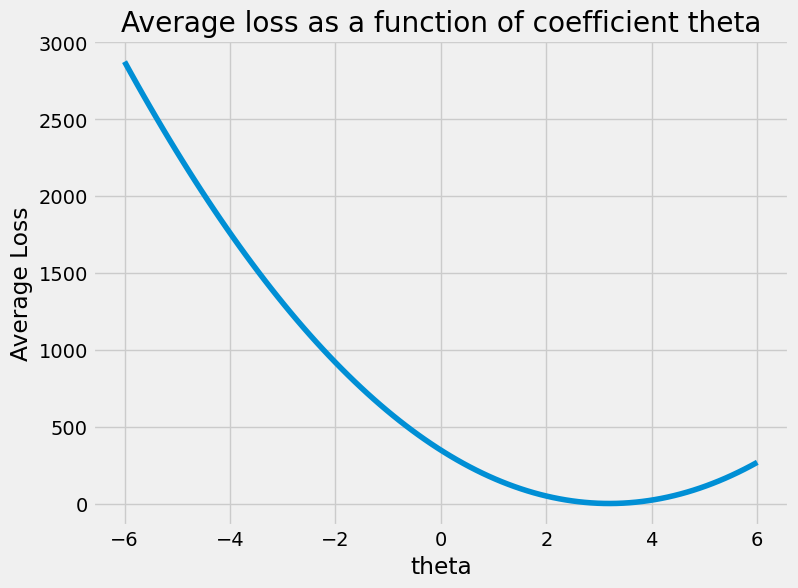

In [20]:
# Solution
thetas = np.linspace(-6, 6, 100)
mse_plot(x, y, thetas)

theta_star_guess = 3

In [21]:
assert mse_loss(3, 2) == 1
assert mse_loss(0, 10) == 100
assert 2 <= theta_star_guess <= 4

---
## Section 2: Fitting our Simple Model<a id='fitting'></a>
Now that we have defined a simple linear model and loss function, let's begin working on fitting our model to the data.

**Question 2.1 (1pt):** Let's confirm our visual findings for our optimal coefficient $\theta^*$. First, identify the analytical solution for the optimal $\theta^*$ that minimizes average MSE loss. Of the three options, below, which correctly gives the formula that tells us what $\theta^*$ is given $i$ observations of $x$ and $y$? Highlight your answer in <font color = "red">red</font> (double click this cell if you don't know how to do this).

1. $$\Large {\theta}^* = \frac{\sum x_iy_i}{\sum x_i}$$ <br>
2. $$\Large {\theta}^* = \frac{\sum x_i + y_i}{\sum x_i^2}$$ <br>
3. $$\Large {\theta}^* = \frac{\sum x_iy_i}{\sum x_i^2}$$ <br>

*Solution:* 3

**Question 2.2 (1pt):** 
Use the analytic solution for $\theta^*$ to implement the function `find_theta`, which calculates the numerical value of $\theta^*$ based on our data $x$, $y$. 

In [22]:
def find_theta(x, y):
    """
    Objective: Find optimal theta given x and y
    Inputs:
        - x: the vector of values x
        - y: the vector of values y
    Output: the optimal theta_star 
    """
    ...

t_star = find_theta(x, y) # Your code here to get theta star

In [23]:
# SOLUTION
def find_theta(x, y):
    """
    Objective: Find optimal theta given x and y
    Inputs:
        - x: the vector of values x
        - y: the vector of values y
    Output: the optimal theta_star
    """
    theta_opt = np.sum(np.multiply(x,y))/np.sum(np.multiply(x,x))
    return theta_opt

t_star = find_theta(x, y)

In [24]:
# run this cell; do not change it
print(f'theta_opt = {t_star}')
assert 3 <= t_star <= 4

theta_opt = 3.193877731029364


**Question 2.3 (1pt):** Now, let's plot our loss function again using the `mse_plot()` function. This time, add a vertical line at the optimal value of theta (i.e. plot the line $x = \theta^*$). The function `plt.axvline()` is helpful here.

In [25]:
# mse_plot(...) # plot the loss function
# ... # add a vertical line

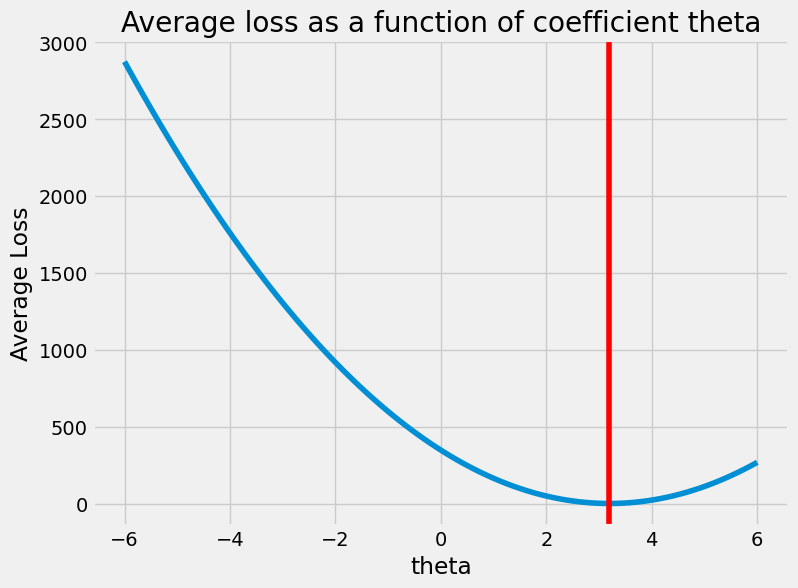

In [26]:
# SOLUTION
mse_plot(x, y, thetas)
plt.axvline(x=t_star, color='r')

**Question 2.4 (1pt):** We now have an optimal value for $\theta$ that minimizes our loss. In the cell below, plot the scatter plot of the data from Question 1.1 (you can reuse the `scatter()` function here). Add the best-fit line $\hat{y} = \theta^* \cdot x$ using the $\theta^*$ you computed above.

In [27]:
... # Plot the observations as a scatter plot
... # add a line of best fit based on your calculated value of t_star

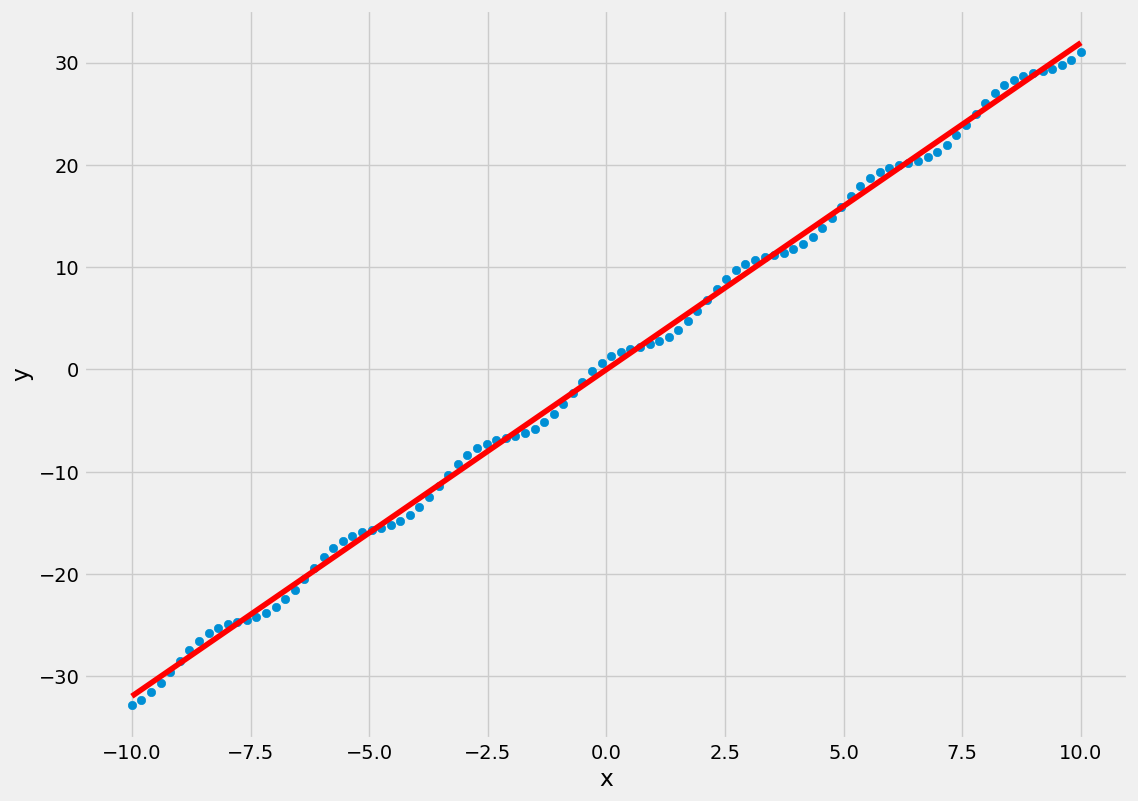

In [28]:
# SOLUTION
scatter(x,y)
plt.plot(x, t_star*x, color='r')
plt.show()

**Question 2.5 (1pt):** Great! It looks like our estimate for $\theta$ is able to capture a lot of the data with a single parameter. Now let's try to plot the residual to see what we've missed.<br>  

The residual is defined as $r=y-\theta^* \cdot x$. Below, write a function to find the residual and plot the residuals as a function of the independent variable in a scatter plot (use `plt.axhline()`). Plot a horizontal line at $y=0$ to assist with visualization. Add axis labels.

In [29]:
def visualize_residual(x, y):
    """
    Objective: Visualize the residuals against a horizontal line at y = 0
    Inputs:
        - x: the vector of values x
        - y: the vector of values y
    Outputs: Plot a scatter plot of the residuals, the remaining 
    values after removing the linear model from our data.
    """
    # calculate residual
    r = ...
    
    # plot residual, including axis labels and vertical line at y=0
    ... 

visualize_residual(x, y)
plt.show()

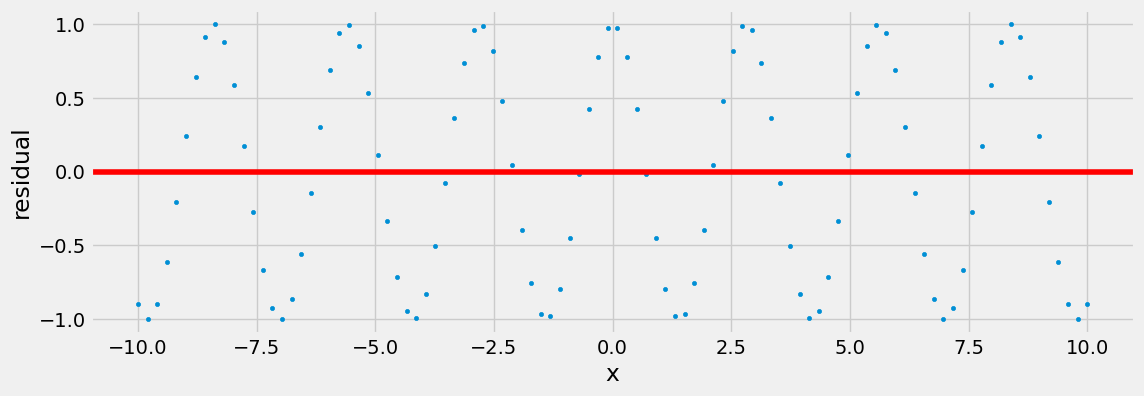

In [30]:
def visualize_residual(x, y):
    """
    Objective: Visualize the residuals against a horizontal line at y = 0
    Inputs:
        - x: the vector of values x
        - y: the vector of values y
    Outputs: Plot a scatter plot of the residuals, the remaining 
    values after removing the linear model from our data.
    """
    # calculate residual
    r = y - linear_model(x, find_theta(x,y))
    
    # plot residual
    plt.figure(figsize = (12,4))
    plt.scatter(x, r, marker='.')
    plt.axhline(0, color = 'r')
    plt.xlabel('x')
    plt.ylabel('residual')

visualize_residual(x, y)
plt.show()

**Question 2.6 (1pt):** What does the residual look like? Do you notice a relationship between $x$ and $r$?

**Possible SOLUTION:** the residual oscillates, and *r* seems to be a periodic function of *x* (i.e. a sinusidal function).

---
## Section 3: Increasing Model Complexity<a id='complexity'></a>

It looks like the remaining data is sinusoidal, meaning our original data follows a linear function and a sinusoidal function. Let's define a new model to address this discovery and find optimal parameters to best fit the data:

$$\Large
\hat{y} = \theta_1x + cos(\theta_2x)
$$

Now, our model is parameterized by both $\theta_1$ and $\theta_2$, or composed together, $\vec{\theta}$.

Note that a generalized cosine function $a\cos(bx+c)$ has three parameters: amplitude scaling parameter $a$, frequency parameter $b$ and phase shifting parameter $c$. We can assume that the scaling and shifting parameter ($a$ and $c$ in this case) are 1 and 0 respectively. 

**Question 3.1 (2pts):** In the following cell, **explain why we can assume the scaling parameter to be 1 and shifting parameter to be 0 based on the residual plot in Question 2e**. 

You might find the following code helpful in visualizing all three parameters.

```python
def plot_cosine_generalized(a,b,c,label=None):
    """
    Objective: Plot a cosine function with three parameters
    Inputs:
        - a: amplitude scaling parameter
        - b: frequency parameter
        - c: phase shifting parameter
    Output: Plot of cosine using unique a, b, and c values
    """
    X = np.linspace(-5, 5)
    Y = a * np.cos(b*X + c)
    plt.plot(X, Y, ':',label=label)
    plt.legend()
 ```

You can try plotting: 
```python
plot_cosine_generalized(1,1,1, label='cos(x)')
plot_cosine_generalized(1,1,2, label='cos(x + 2)')
plot_cosine_generalized(1,2,2, label='cos(2x + 2)')
plot_cosine_generalized(2,2,2, label='2cos(2x + 2)')
```

In [31]:
# use this cell for scratch work

*Your answer here*

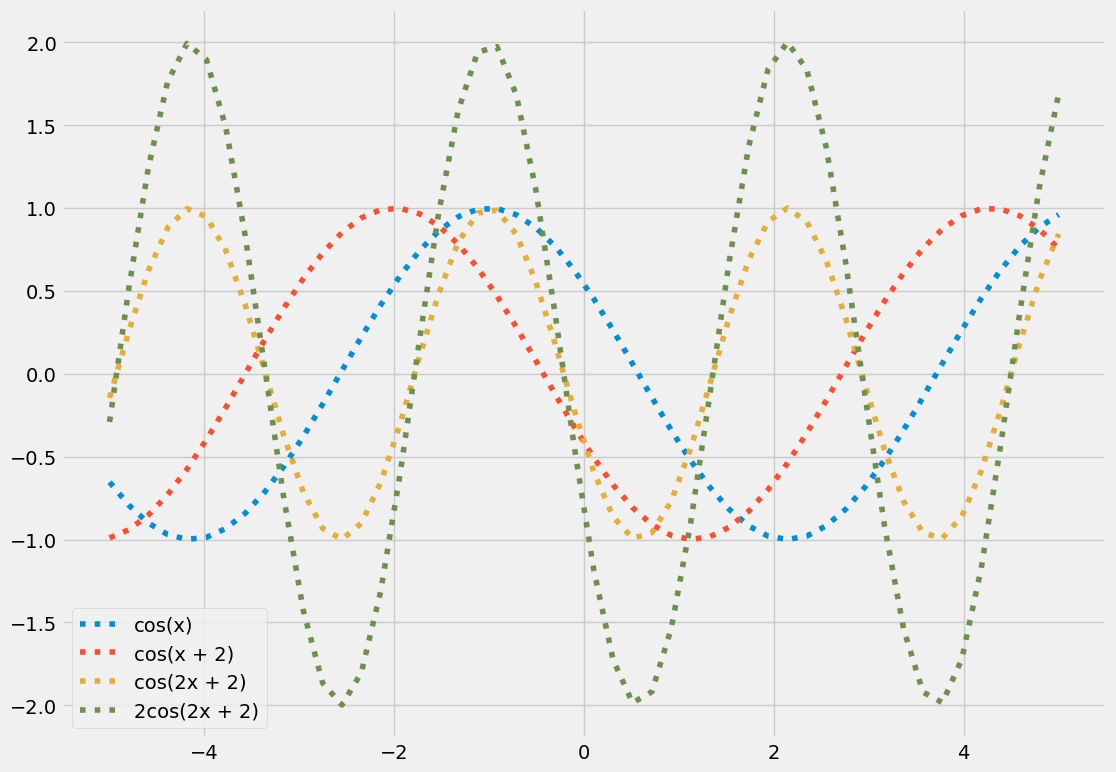

In [32]:
# SOLUTION
def plot_cosine_generalized(a,b,c,label=None):
    """
    Objective: Plot a cosine function with three parameters
    Inputs:
        - a: amplitude scaling parameter
        - b: frequency parameter
        - c: phase shifting parameter
    Output: Plot of cosine using unique a, b, and c values
    """
    X = np.linspace(-5, 5)
    Y = a * np.cos(b*X + c)
    plt.plot(X, Y, ':',label=label)
    plt.legend()
    
plot_cosine_generalized(1,1,1, label='cos(x)')
plot_cosine_generalized(1,1,2, label='cos(x + 2)')
plot_cosine_generalized(1,2,2, label='cos(2x + 2)')
plot_cosine_generalized(2,2,2, label='2cos(2x + 2)')
plt.show()

*Possible SOLUTION: The shifting parameter is 0 because the graph reaches its highest and lowest amplitude at 1 and -1, respectively, meaning it is not shifted left or right.
The scaling parameter is 1 because the points seem to be spread around a sine wave going from -1 to 1.*

**Question 3.2 (1pt):** As in Question 1.3, write a function `cos_model` that predicts a value $\hat{y}$ given inputs $x$, $\theta_1$, and $\theta_2$ based on our new model.

*Hint:* Try to do this without using for loops. The `np.cos` function may help you.

In [33]:
def cos_model(x, theta_1, theta_2):
    """
    Objective: Predict the estimate of y given x, theta_1, theta_2
    Inputs:
        - x: the vector of values x
        - theta_1: the scalar value theta_1
        - theta_2: the scalar value theta_2
    Outputs: predicted value for y_hat
    """
    y_hat = ...
    # YOUR CODE HERE
    
    return y_hat

In [34]:
# SOLUTION
def cos_model(x, theta_1, theta_2):
    """
    Objective: Predict the estimate of y given x, theta_1, theta_2
    Inputs:
        - x: the vector of values x
        - theta_1: the scalar value theta_1
        - theta_2: the scalar value theta_2
    Outputs: predicted value for y_hat
    """
    y_hat = linear_model(x, theta_1) + np.cos(theta_2 * x)
    return y_hat

In [35]:
print(np.isclose(cos_model(1, 1, np.pi), 0))
# Check that we accept x as arrays
assert len(cos_model(x, 2, 2)) > 1

True


**Question 3.3 (1pt):** In this question your job is to match the left and right sides of the equations for:
1. The MSE loss for our model, $\hat{y} = \theta_1x + cos(\theta_2x)$.  We'll call that $L(x, y, \theta_1, \theta_2)$.
2. The partial derivatives of the our model's loss functions, $\frac{\partial L }{\partial \theta_1}, \frac{\partial L }{\partial \theta_2}$. 

Notice that we now have $\vec{x}$ and $\vec{y}$ instead of $x$ and $y$. This means that when determining the loss function $L(x, y, \theta_1, \theta_2)$, you'll need to take the average of the squared losses for each $y_i$, $\hat{y_i}$ pair.

As your answer below, match the right side (letters) to the correct left sides (numbers).

1. $L(x, y, \theta_1, \theta_2)$ <br>
2. $\frac{\partial L}{\partial \theta_1}$ <br>
3. $\frac{\partial L}{\partial \theta_2}$ <br>

A. $\frac{2}{n} \sum_{i=1}^n (x_i y_i \sin(\theta_2 x_i) - \theta_1 x_i ^ 2 \sin(\theta_2 x_i) - x_i \sin(\theta_2 x_i)\cos(\theta_2 x_i))$<br>
B.$\frac{1}{n} \sum_{i=1}^n (y_i - \theta_1 x_i - \cos(\theta_2 x_i)) ^ 2$<br>
C. $-\frac{2}{n} \sum_{i=1}^n (x_i y_i - \theta_1 x_i ^ 2 - x_i \cos(\theta_2 x_i))$<br>


*Your answer*: <br>
1. ... <br>
2. ... <br>
3. ... <br>

Solution: <br>
1. B
2. C
3. A

**Question 3.4 (2pts):** Now, implement the functions `dt1` and `dt2`, which should compute $\frac{\partial L }{\partial \theta_1}$ and $\frac{\partial L }{\partial \theta_2}$ respectively. Use the formulas for $\frac{\partial L }{\partial \theta_1}$ and $\frac{\partial L }{\partial \theta_2}$ from the previous exercise. In the functions below, the parameter `theta` is a vector that looks like $[ \theta_1, \theta_2 ]$.

In [36]:
def dt1(x, y, theta):
    """
    Objective: Compute the numerical value of the partial derivative of MSE loss with respect to theta_1
    Inputs:
        - x: the vector of all x values
        - y: the vector of all y values
        - theta: the vector of values theta
    Output: the numerical value of the partial derivative of MSE loss with respect to theta_1
    """
    # YOUR CODE HERE

In [37]:
def dt2(x, y, theta):
    """
    Objective: Compute the numerical value of the partial derivative of MSE loss with respect to theta_2
    Inputs:
        - x: the vector of all x values
        - y: the vector of all y values
        - theta: the vector of values theta
    Output: the numerical value of the partial derivative of MSE loss with respect to theta_2
    """
    
    # YOUR CODE HERE

In [38]:
# SOLUTION
def dt1(x, y, theta):
    """
    Objective: Compute the numerical value of the partial derivative of MSE loss with respect to theta_1
    Inputs:
        - x: the vector of all x values
        - y: the vector of all y values
        - theta: the vector of values theta
    Output: the numerical value of the partial derivative of MSE loss with respect to theta_1
    """
    to_be_summed = x*y - theta[0]*(x**2) - x*np.cos(theta[1]*x)
    return (-2/len(x))*np.sum(to_be_summed)

In [39]:
# SOLUTION
def dt2(x, y, theta):
    """
    Objective: Compute the numerical value of the partial derivative of MSE loss with respect to theta_2
    Inputs:
        - x: the vector of all x values
        - y: the vector of all y values
        - theta: the vector of values theta
    Output: the numerical value of the partial derivative of MSE loss with respect to theta_2

    """
    to_be_summed = x*y*np.sin(theta[1]*x) - theta[0]*(x**2)*np.sin(theta[1]*x) - x*np.sin(theta[1]*x)*np.cos(theta[1]*x)
    return (2/len(x))*np.sum(to_be_summed)

In [40]:
# This function calls dt1 and dt2 and returns the gradient dt. It is already implemented for you.
def dt(x, y, theta):
    """
    Objective: Calculate the gradient of MSE loss with respect to vector theta
    Keyword arguments:
        - x: the vector of values x
        - y: the vector of values y
        - theta: the vector of values theta
    Output: the gradient dt
    """
    return np.array([
        dt1(x, y, theta),
        dt2(x, y, theta)
    ])

In [41]:
print(np.isclose(dt1(x, y, [0, np.pi]), -217.22670090329441))
print(np.isclose(dt2(x, y, [0, np.pi]), 1.3275857635175532))

True
True


---
## Section 4: Gradient Descent<a id='gd'></a>
Now try to solve for the optimal $\theta^*$ analytically...

**Just kidding!**

You can try but we don't recommend it. When finding an analytic solution becomes difficult or impossible, we resort to alternative optimization methods for finding an approximate solution.

So let's try implementing a numerical optimization method: gradient descent!


**Question 4.1 (3pts):** Implement the `grad_desc` function that performs gradient descent for a finite number of iterations. This function takes in array $x$, array $y$, and an initial value for $\theta$ (`theta`). `alpha` will be the learning rate (or step size, whichever term you prefer). In this part, we'll use a static learning rate that is the same at every time step. 

At each time step, use the gradient and `alpha` to update your current `theta`. Also at each time step, be sure to save the current `theta` in `theta_history`, along with the MSE loss (computed with the current `theta`) in `loss_history`.

Hints:
- Write out the gradient update equation (1 step). What variables will you need for each gradient update? Of these variables, which ones do you already have, and which ones will you need to recompute at each time step?
- You may need a loop here to update `theta` several times.

In [42]:
# Run this cell
def init_t():
    """Creates an initial theta [2, -2] as a starting point for gradient descent"""
    return np.array([2,-2])

In [43]:
def grad_desc(x, y, theta, num_iter=20, alpha=0.01):
    """
    Objective: Run gradient descent update for a finite number of iterations and static learning rate

    Inputs:
        - x: the vector of values x
        - y: the vector of values y
        - theta: the vector of values theta to use at first iteration
        - num_iter: the max number of iterations
        - alpha: the learning rate (also called the step size)
    
    Outputs:
        - theta: the optimal value of theta after num_iter of gradient descent
        - theta_history: the series of theta values over each iteration of gradient descent
        - loss_history: the series of loss values over each iteration of gradient descent
    """
    
    # YOUR CODE HERE
    
    
    return theta, theta_history, loss_history

In [44]:
# SOLUTION
def grad_desc(x, y, theta, num_iter=20, alpha=0.01):
    """
    Objective: Run gradient descent update for a finite number of iterations and static learning rate

    Inputs:
        - x: the vector of values x
        - y: the vector of values y
        - theta: the vector of values theta to use at first iteration
        - num_iter: the max number of iterations
        - alpha: the learning rate (also called the step size)
    
    Outputs:
        - theta: the optimal value of theta after num_iter of gradient descent
        - theta_history: the series of theta values over each iteration of gradient descent
        - loss_history: the series of loss values over each iteration of gradient descent
    """
    theta_history = []
    loss_history = []
    
    for i in range(num_iter):
        loss_history.append(mse_loss(y, theta[0]*x + np.cos(theta[1]*x)))
        theta = theta - alpha*dt(x,y,theta)
        theta_history.append(theta)
        
    return theta, theta_history, loss_history

In [45]:
# run this cell, do not change them
t = init_t() # set initial theta values
t_est, ts, loss = grad_desc(x, y, t)

assert len(ts) == len(loss) == 20 # theta history and loss history are 20 items in them
assert ts[0].shape == (2,) # theta history contains theta values
assert np.isscalar(loss[0]) # loss history is a list of scalar values, not vector

assert loss[1] - loss[-1] > 0 # loss is decreasing

assert np.allclose(np.sum(t_est), 0.9, atol=2e-1)  # theta_est should be close to our value

**Question 4.2 (2pts):** Let's visually inspect our results of running gradient descent to optimize $\theta$. Plot our x values with our model's predicted y values over the original scatter plot. Include a legend on your plot. Did gradient descent successfully optimize $\theta$?

In [46]:
# Run this cell
t = init_t()
t_est, ts, loss = grad_desc(x, y, t)

In [47]:
# YOUR CODE HERE
# get predicted y values from sinusoidal model based on thetas obtained through gradient descent
# plot model's predicted values as a line plot
# plot actual observations as a scatter plot

*YOUR ANSWER HERE*

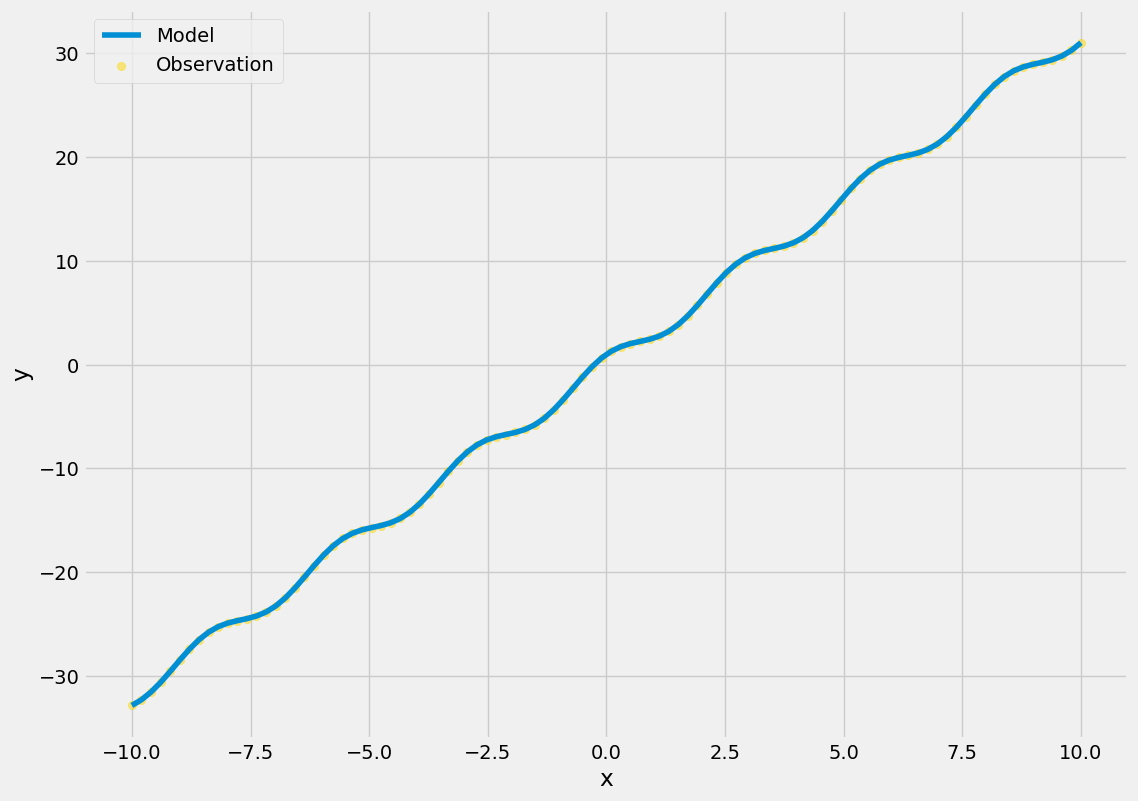

In [48]:
# solution
y_pred = cos_model(x, t_est[0], t_est[1])

plt.plot(x, y_pred, label='Model')
plt.scatter(x, y, alpha=0.5, label='Observation', color='gold')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Question 4.3 (1pt):** Let's visualize gradient descent to see how it converges. Plot a line plot with the loss values on the y-axis and the iteration number (i.e., 0-20) on the x-axis for your gradient descent. 

In [49]:
# YOUR CODE HERE

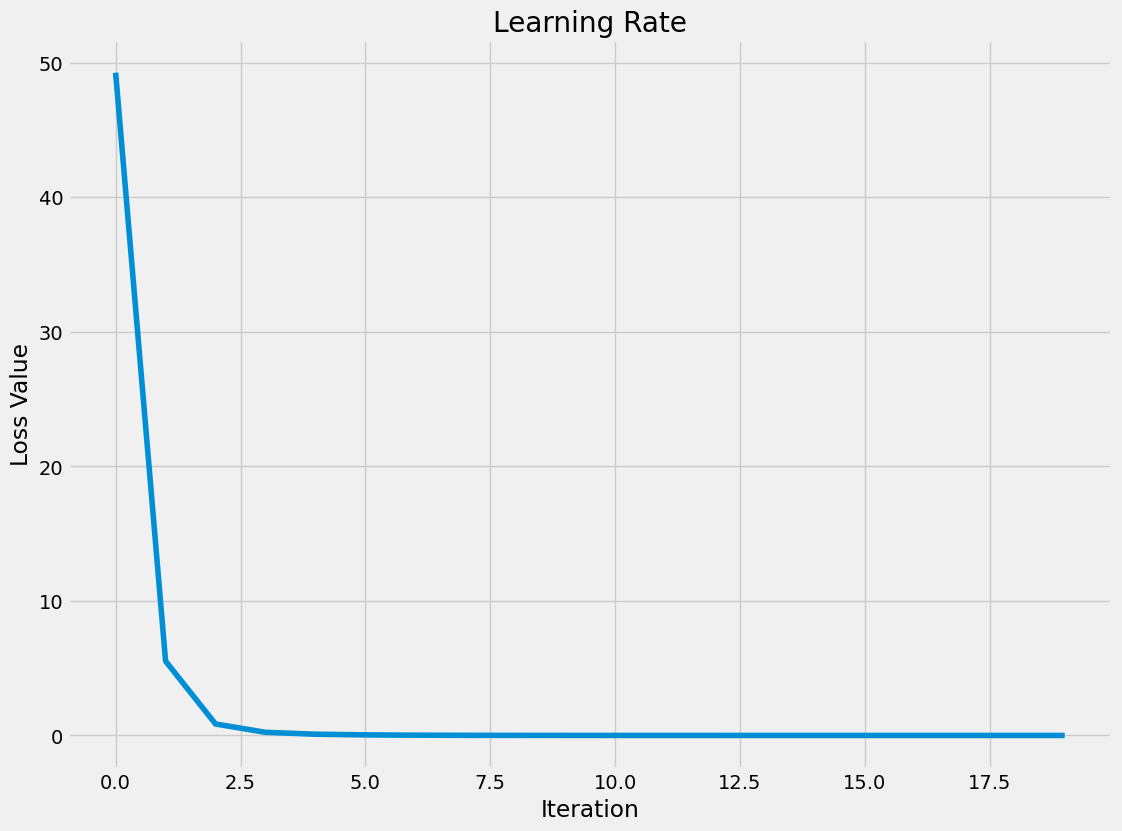

In [50]:
# SOLUTION
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss Value')
plt.title("Learning Rate")
plt.show()

**Question 4.4 (2pts):** Create a single plot that shows the loss value (y-axis) versus the iteration (x-axis) for different values of `alpha`: try using `alpha` = 0.01, `alpha` = 0.001, and `alpha` = 0.0001. Add a legend. How does the loss value change over different iterations when alpha varies? Based on what you know about gradient descent, why does the loss value change in this way?<br>

*Note*: if you have a function that returns multiple values, but you only care about some of those values, you can use `_` to indicate that you don't want to save a given output. For instance, running: `_,_, loss = grad_desc(x, y, t)` would only save the return value for `loss_history`, and not `theta` or `theta_history`. This can save you some memory.

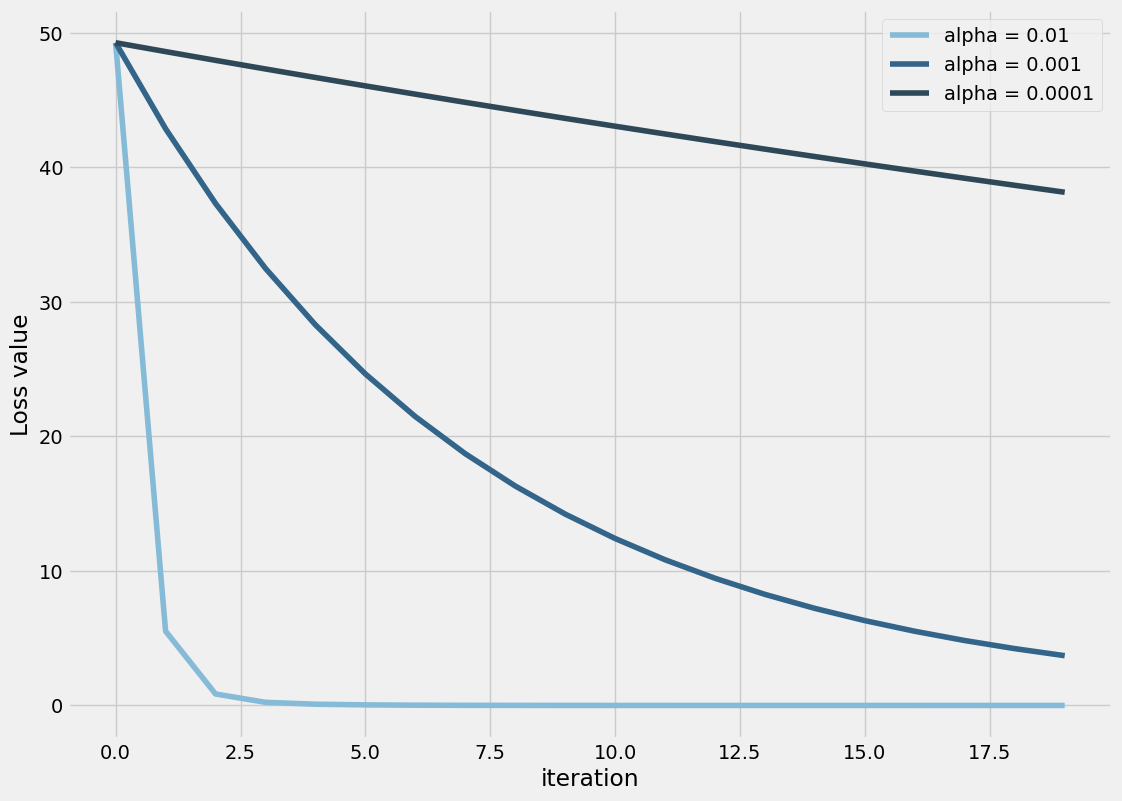

In [51]:
# SOLUTION
_,_,a01 = grad_desc(x, y, t, alpha = 0.01)
_,_,a001 = grad_desc(x, y, t, alpha = 0.001)
_,_,a0001 = grad_desc(x, y, t, alpha = 0.0001)

for a_list, a_value, a_color in zip([a01,a001,a0001],[0.01,0.001,0.0001], ["#86BBD8","#33658A", "#2F4858"]):
    plt.plot(a_list, label = "alpha = " + str(a_value), color = a_color)
    
plt.legend()
plt.xlabel("iteration")
plt.ylabel("Loss value");

*YOUR ANSWER HERE*


*Possible SOLUTION:* Key points are that at higher alphas, the loss value converges more quickly - for alpha = 0.01, it takes about 6 iterations, and for large alphas, it takes many more iterations. This happens because gradient descent updates its estimate for theta based on two values: the gradient at the previous value of theta, and the learning rate. At a larger learning rate, the updated estimate for alpha will converge more quickly because the gradient descent is taking larger "jumps" along the loss function.

A complete answer should explain the trend (how the curve changes with learning rate) and the reasoning.

## Extra credit
How--and why--does your model change if you set the initial conditions in the `init_t` function to significantly different values (e.g., 0,0)?

In [ ]:
# Scratch work here

*YOUR ANSWER HERE*

*SOLUTION:* your solution will converge around different (incorrect) values for theta. This occurs because the gradient descent function is getting "stuck" at a local minimum.


----

## Bibliography

+ Data 100 - HW 5: Modeling, Estimation and Gradient Descent

<hr/>

Data Science Modules: http://data.berkeley.edu/education/modules